# Overview

In today's session, groups of students will work on a few sample exercises to get familiarized with Ethereum transaction data.

1. Form groups of 3-4
2. Groups will work on Ethereum transactions between block 10230000 to 10240000.
3. Every group starts with general data preparation and then selects a focus area : Sender analytics, Receiver analytics, Fee analytics, Block analytics
4. We will reserve last 10 minutes for a short 2-3 minute presentation from each group


# Data Prep

1. Load csv files to a dataframe or any other data structure of your choice
2. Join individual dataframes to a single dataframe
3. Data checks to ensure that the data is read correctly

In [1]:
# import packages
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# read files to individual dataframes and convert to a single dataframe
# remove duplicate transactions

In [3]:
path = "./data"
dfs = []
for f in os.listdir(path):
    dfs.append(pd.read_csv(os.path.join(path, f)))
df = pd.concat(dfs, axis=0, ignore_index=True)
# Remove duplicate transactions
df.drop_duplicates("Tx_Hash", inplace=True)

In [4]:
# 1. What is the shape (number of rows and number of columns) of the combined dataframe

In [5]:
df.shape

(1464829, 12)

In [6]:
# 2. What is the minimum and maximum blocknumber

In [7]:
print(df.Block_Number.min())
print(df.Block_Number.max())

10230000
10240000


In [8]:
# 3. Is Tx_Hash column a primary key in this table ?

In [9]:
df.Tx_Hash.is_unique

True

# Focus area : Sender analytics
Focus on the sender field (Tx_From) of each transaction and answer the following questions

In [10]:
# 1. For each unique address, calculate the number of times the address has initiated a transaction

In [11]:
print(df.Tx_From.value_counts())

ddd26c200bf6dbb775a9d91fc24b5ece5be7a45f    23257
05b57d05b11436e828a43867cb95de4f589d0b9a    21032
ea674fdde714fd979de3edf0f56aa9716b898ec8    20404
00a2b2a9d01a80d1c0219a4b4bc6a02541e3eaa3    17955
c6bd3edd07e294cb66b8318356d688b3516ea950    10723
                                            ...  
baaadb3abfb710059257fe0f7747eefe64c3c96e        1
74a53970ae7ee05693c304078d66f386a5fb9db9        1
a085935ed99e35874929572e8a75fb16d541e033        1
c8546029ab197b4df699c980fe1c0ec5be7f1a28        1
7594558a581c44eb1867bc513c5462a6c52890e4        1
Name: Tx_From, Length: 421891, dtype: int64


In [12]:
# 2. Find the address with the most number of transactions

In [13]:
df.Tx_From.value_counts().idxmax()

'ddd26c200bf6dbb775a9d91fc24b5ece5be7a45f'

In [14]:
# 3a. What fraction of addresses have sent a single transaction


In [15]:
(df.Tx_From.value_counts() == 1).where(lambda x: x).dropna().sum() / df.Tx_From.nunique()

0.7419594160577021

In [16]:
# 3b. What fraction of addresses have sent two transactions


In [17]:
(df.Tx_From.value_counts() == 2).where(lambda x: x).dropna().sum() / df.Tx_From.nunique()

0.13668459388799475

In [18]:
# 4. Draw a graph with number of transactions sent by address on X-axis and Number of addresses on Y-axis

Text(0, 0.5, 'Number of addresses')

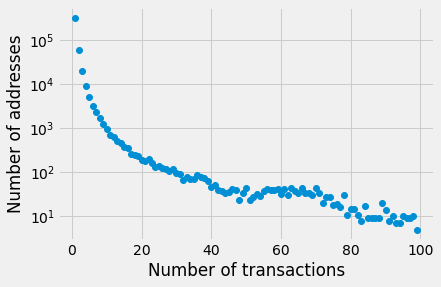

In [19]:
counts = df.Tx_From.value_counts()
counts = counts[counts < 100].value_counts()
plt.plot(counts.index, counts, 'o')
plt.yscale('log') 
plt.xlabel("Number of transactions")
plt.ylabel("Number of addresses")

In [20]:
# 5. Can you think of any other sender metrics


In [21]:
# Most active sender : Activity of a sender is defined by the number of blocks in which user has sent a transaction
num_active_blocks = df.groupby("Tx_From").apply(lambda x: x.Block_Number.nunique())
print(num_active_blocks.idxmax(), num_active_blocks.max())

a7a7899d944fe658c4b0a1803bab2f490bd3849e 3652


# Focus area : Receiver analytics
Focus on the sender field (Tx_To) of each transaction and answer the following questions

In [22]:
# 1. For each unique address, calculate the ￼number of times the address has received a transaction

In [23]:
df.Tx_To.value_counts()

dac17f958d2ee523a2206206994597c13d831ec7    324300
5acc84a3e955bdd76467d3348077d003f00ffb97     27266
912656188616e0184e3181f019022990a63280b1     24899
8a91c9a16cd62693649d80afa85a09dbbdcb8508     24071
860bd2dba9cd475a61e6d1b45e16c365f6d78f66     23863
                                             ...  
0a83eb3a6c5b357b1b07806238afa8198556e94b         1
648d53ac6827f40ae4b597591aa809f6cc3b2ec1         1
872a58ea4c1bef45012fde0da28b8b6e547e66c6         1
9363ccba89926d51fe90e6b522df9a5943d12691         1
50369d4bfaabc1ce19ae5cbf06e9e9525f476231         1
Name: Tx_To, Length: 308314, dtype: int64

In [24]:
# 2. Ethereum contract deployment transactions have an empty To value. How many contracts are deployed in this dataset ?

In [25]:
df.Tx_To.isna().sum()

3389

In [26]:
# 3a. What fraction of addresses have received a single transaction


In [27]:
(df.Tx_To.value_counts() == 1).where(lambda x: x).dropna().sum() / df.Tx_To.nunique()

0.7812879077823258

In [28]:
# 3b. What fraction of addresses have received two transactions

In [29]:
(df.Tx_To.value_counts() == 2).where(lambda x: x).dropna().sum() / df.Tx_To.nunique()

0.13722373943447264

In [30]:
# 4. Draw a graph with number of transactions sent to address on X-axis and Number of addresses on Y-axis

Text(0, 0.5, 'Number of addresses')

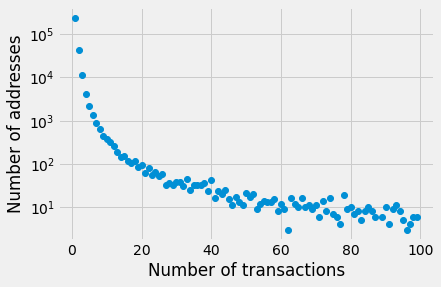

In [31]:
counts = df.Tx_To.value_counts()
counts = counts[counts < 100].value_counts()
plt.plot(counts.index, counts, 'o')
plt.yscale('log')
plt.xlabel("Number of transactions")
plt.ylabel("Number of addresses")

In [32]:
# 5. Can you think of any other receiver metrics


In [33]:
# Most popular receiver : Popularity of a receiver is defined by the number of unique addresses from which it received a transaction
popularity = df.groupby("Tx_To").apply(lambda x: x.Tx_From.nunique())
print(popularity.idxmax(), popularity.max())
# https://etherscan.io/address/0xdac17f958d2ee523a2206206994597c13d831ec7

dac17f958d2ee523a2206206994597c13d831ec7 116706


# Focus area : Fee analytics

Focus on  'Tx_Gas','Tx_GasPrice', 'Tx_Value', 'Tx_Nonce', 'Tx_Cost' fields of the dataframe

In [34]:
# 1. Using the Tx_Value field, find the transaction (hash) with highest value

In [35]:
tx = df.loc[df.Tx_Value.apply(lambda x: float(x)).idxmax()]
print(tx)
print(tx.Tx_Hash)

Block_Number                                             10239450
Tx_Hash         db46bcd9a9f7fce4a75c7a1835b6bcb1dfa3754cc905f2...
Tx_From                  2a44ef8d80f1837ac03a1c7e26e58f354c2bac29
Tx_To                    4f6742badb049791cd9a37ea913f2bac38d01279
Tx_Data                                                       NaN
Tx_Gas                                                      21000
Tx_GasPrice                                           27500000000
Tx_Tip                                                27500000000
Tx_FeeCap                                             27500000000
Tx_Value                                  66026000053160600000000
Tx_Nonce                                                        2
Tx_Cost                                   66026000630660600000000
Name: 1082666, dtype: object
db46bcd9a9f7fce4a75c7a1835b6bcb1dfa3754cc905f2a708a19d7c5530f4d4


In [36]:
# 2. Using etherscan.io and coinmarketcap.com, find the dollar amount of the above transaction then and today

In [37]:
#https://etherscan.io/tx/0xdb46bcd9a9f7fce4a75c7a1835b6bcb1dfa3754cc905f2a708a19d7c5530f4d4
3075 * 66026.0000531606

203029950.16346887

In [38]:
# 3. Find the most common Gas cost ? What kind of transaction does it represent ?

In [39]:
df.Tx_Gas.value_counts().idxmax()
# Gas cost for simple transfers

21000

In [40]:
# 4. Find the transaction with highest fee and what is it's cost today ?

In [41]:
df.loc[df.Tx_GasPrice.idxmax()].Tx_Hash
#https://etherscan.io/tx/0xca8f8c315c8b6c48cee0675677b786d1babe726773829a588efa500b71cbdb65

'ca8f8c315c8b6c48cee0675677b786d1babe726773829a588efa500b71cbdb65'

In [42]:
# 5. Do you think the above transaction is an outlier ? Can you come up with a theory to explain this transaction ?

In [43]:
# 6. Find the block with highest average gas price. Does it have the above transaction ?

In [44]:
df.groupby("Block_Number")["Tx_GasPrice"].mean().idxmax()

10237208

# Block analytics

Group by "Block_Number" to get block level stats df.func_hash.value_counts().idxmax() df.func_hash.value_counts().idxmax()

In [45]:
#1. Find the block with highest number of transactions and how many transactions does it have

In [46]:
idx = df.groupby("Block_Number").size().idxmax()
print(idx)
print(len(df[df.Block_Number == idx]))

10235430
473


In [47]:
#2. Find the block with least number of transactions and how many transactions does it have

In [48]:
idx = df.groupby("Block_Number").size().idxmin()
print(idx)
print(len(df[df.Block_Number == idx]))

10231550
2


In [49]:
# 3. Using etherscan.io, find the average block time during this period

In [50]:
nblocks = df.groupby("Block_Number").size()
timediff =  pd.to_datetime("Jun-10-2020 08:03:26 PM") - pd.to_datetime("Jun-09-2020 06:44:19 AM")
print( timediff / len(nblocks))

0 days 00:00:14.054503609


In [51]:
# 4. The first 8 characters (if its exists) of Tx_Data is the keccak256 hash of the function that is invoked in the transaction. Use https://www.4byte.directory/signatures/ to find a signature of the most common function during this time.

In [52]:
import numpy as np
df["func_hash"] = df.Tx_Data.apply(lambda x: x[:8] if not isinstance(x, float) else np.nan)
df.func_hash.value_counts().idxmax()              

'a9059cbb'